# TechPoint Xtern Data Science Assesment 2020
Task: 

Review the data and draw four conclusions you can find from the data set. Some ideas of conclusions could include: trying to identify the trending restaurants with your own scoring algorithm (can be as simple as the best rating or most votes or both!), clustering restaurant locations to figure out the optimized FoodieX pick up zones, estimating cook time based on restaurant info, and demonstrating your findings using a data visualization tool. As an important member of the FoodieX team, you get to come up with your own analysis! So try your best to dig out any useful information out of this data set. The sky's the limit! 🤓

## Conclusions Will be at bottom of the Notebook


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('2020-XTern-DS.csv')

In [4]:
df.head() # Get an idea of what the data set looks like 

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [6]:
df.isnull().sum()

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

In [27]:
# No Null Values in the Data Set
def convertToNumber(string):
    s = ''
    for letter in string:
        if letter.isnumeric() or letter == '.':
            s += letter
    if s == '': 
        return 0
    return float(s)

In [28]:
df['AvgCost'] = df.Average_Cost.apply(lambda x: convertToNumber(x))
df['MinOrder'] = df.Minimum_Order.apply(lambda x: convertToNumber(x))
df['CookTime'] = df.Cook_Time.apply(lambda x: convertToNumber(x))

In [29]:
df['FloatRating'] = df.Rating.apply(lambda x: convertToNumber(x))

Text(0.5, 1.0, 'Cook Time Vs Rating')

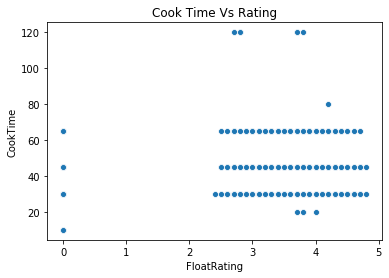

In [64]:
sns.scatterplot(data=df, x='FloatRating', y='CookTime').set_title('Cook Time Vs Rating')

Text(0.5, 1.0, 'Avg Cost Vs Rating')

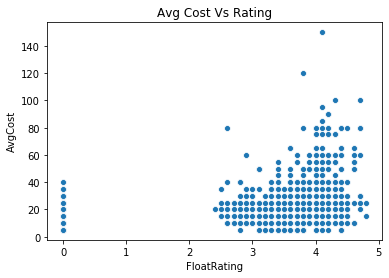

In [63]:
sns.scatterplot(data=df, x='FloatRating', y='AvgCost').set_title('Avg Cost Vs Rating')

Text(0.5, 1.0, 'MinOrder Vs Rating')

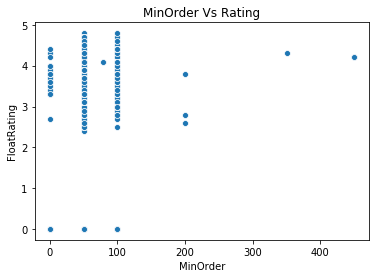

In [41]:
sns.scatterplot(x='MinOrder', y='FloatRating', data=df).set_title('MinOrder Vs Rating')

Text(0.5, 1.0, 'Votes Vs Float Rating')

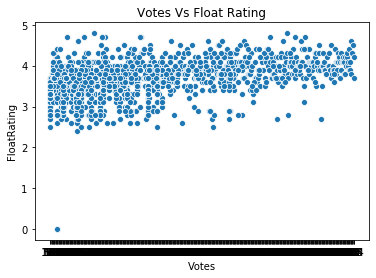

In [44]:
sns.scatterplot(x='Votes', y='FloatRating', data=df).set_title('Votes Vs Float Rating')

Text(0.5, 1.0, 'Reviews Vs Float Rating')

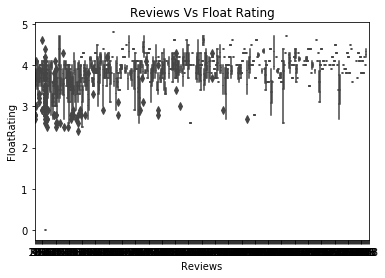

In [46]:
sns.scatter(x='Reviews', y='FloatRating', data=df).set_title('Reviews Vs Float Rating')

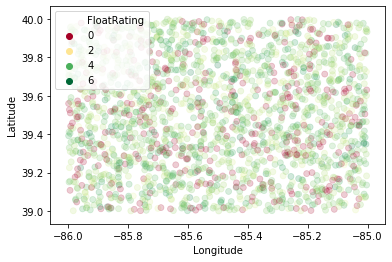

In [73]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='FloatRating', edgecolor=None, alpha=0.2, palette='RdYlGn')
# All locations given seem to have a similar rating No One area with a clusterings

In [60]:
highRatedDF = df[df.FloatRating > 3.5]
lowRatedDF = df[df.FloatRating < 3.5]

In [61]:
highRatedDF.AvgCost.mean()

24.605405405405406

In [62]:
lowRatedDF.AvgCost.mean() # Possible Conclusion High rated restaurants generally have a higher average cost

16.29100529100529

In [65]:
highRatedDF.CookTime.mean()

39.94054054054054

In [66]:
lowRatedDF.CookTime.mean()

34.095238095238095

In [74]:
df.CookTime.mean() # Cook Time does not effect rating 

36.92174343734522

In [222]:
# find most cost effective 

In [230]:
split = [x.split(', ') for x in df.Cuisines]
foods = {}
for l in split:
    for f in l:
        if f not in foods:
            foods[f] = []

In [231]:
for food in foods:
    length = 0
    s = 0
    for i, j in enumerate(split):
        if food in j:
            s += df.iloc[i]['AvgCost']
            length += 1
    foods[food].append((s / length))

In [233]:
for food in foods:
    length = 0
    s = 0
    for i, j in enumerate(split):
        if food in j:
            s += df.iloc[i]['CookTime']
            length += 1
    foods[food].append((s / length))

In [236]:
for food in foods:
    length = 0
    s = 0
    for i, j in enumerate(split):
        if food in j:
            s += df.iloc[i]['FloatRating']
            length += 1
    foods[food].append((s / length))

In [238]:
# Organized by, Average of AvgCost of a restaurant, Avg CookTime, Avg Rating

In [263]:
less = 100
more = 0
keyl = 0
keym = 0
for i, j in enumerate(foods):
    if foods[j][1] > more:
        more = foods[j][1]
        keym = j
    if foods[j][1] < less:
        less = foods[j][1]
        keyl = j
print(keyl, less)
print(keym, more)
for food in foods:
    if foods[food][1] == less: 
        print(food)

Bihari 30.0
Belgian 65.0
Bihari
Hyderabadi
Assamese
Chettinad
Parsi
Tamil
Cantonese
North Eastern
Bar Food
Konkan
Paan
Bohri
Afghan
Goan
Raw Meats
Vietnamese
Sri Lankan
Poké
Roast Chicken
Naga
Korean
Awadhi
French
Charcoal Chicken
Bangladeshi


In [106]:
def bangForBuck(data):
    num = 100
    row = 0
    for i in range(len(data)):
        avg = df.iloc[i]['AvgCost']
        time = df.iloc[i]['CookTime']
        result = np.sqrt(avg**2 + time**2)
        if result < num:
            num = result
            row = i
    return data.iloc[row]
def cheapest(data):
    num = 100
    row = 0
    for i in range(len(data)):
        avg = df.iloc[i]['AvgCost']
        if avg < num:
            num = avg
            row = i
    return data.iloc[row]

In [101]:
bangForBuck(df)

Restaurant                       ID_3209
Latitude                         39.9005
Longitude                       -85.3909
Cuisines         Fast Food, Healthy Food
Average_Cost                      $10.00
Minimum_Order                     $50.00
Rating                               NEW
Votes                                  -
Reviews                                -
Cook_Time                     10 minutes
AvgCost                               10
MinOrder                              50
CookTime                              10
FloatRating                            0
Name: 252, dtype: object

In [103]:
bangForBuck(lowRatedDF)

Restaurant          ID_7130
Latitude            39.8002
Longitude          -85.2593
Cuisines            Biryani
Average_Cost         $15.00
Minimum_Order        $50.00
Rating                  3.4
Votes                     9
Reviews                   -
Cook_Time        30 minutes
AvgCost                  15
MinOrder                 50
CookTime                 30
FloatRating             3.4
Name: 526, dtype: object

In [105]:
bangForBuck(highRatedDF)

Restaurant                                               ID_4729
Latitude                                                 39.6181
Longitude                                               -85.2396
Cuisines         North Indian, Italian, Continental, Finger Food
Average_Cost                                              $50.00
Minimum_Order                                             $50.00
Rating                                                       3.9
Votes                                                        268
Reviews                                                      142
Cook_Time                                             45 minutes
AvgCost                                                       50
MinOrder                                                      50
CookTime                                                      45
FloatRating                                                  3.9
Name: 565, dtype: object

In [107]:
cheapest(highRatedDF)

Restaurant                   ID_3994
Latitude                     39.2602
Longitude                   -85.1827
Cuisines         North Indian, Rolls
Average_Cost                  $15.00
Minimum_Order                 $50.00
Rating                           3.9
Votes                            387
Reviews                          160
Cook_Time                 45 minutes
AvgCost                           15
MinOrder                          50
CookTime                          45
FloatRating                      3.9
Name: 21, dtype: object

In [108]:
cheapest(lowRatedDF)

Restaurant           ID_4494
Latitude             39.3765
Longitude           -85.8287
Cuisines         Street Food
Average_Cost          $10.00
Minimum_Order         $50.00
Rating                   3.4
Votes                     23
Reviews                    7
Cook_Time         30 minutes
AvgCost                   10
MinOrder                  50
CookTime                  30
FloatRating              3.4
Name: 36, dtype: object

In [209]:
# scoring system
# (avg cost / cook time) * 10 + Rating = Rating out of ten
# assumption: the higher the cost the better quality the food will be
# Fanciest Restaurant
# Conclusion Restaurant ID_8403
def bestRest(data):
    highScore = 0
    row = 0
    for i in range(len(data)):
        avg = df.iloc[i]['AvgCost']
        cookTime = df.iloc[i]['CookTime']
        score = (avg / cookTime) * 3.67 + df.iloc[i]['FloatRating']
        if score > highScore:
            highScore = score
            row = i
    return data.iloc[row].Restaurant, highScore

def setTen(num):
    if num > 10:
        return 10
    return num

In [210]:
df['TopScore'] = (df['AvgCost'] / df['CookTime']) * 3.67 + df['FloatRating']
df.TopScore = df.TopScore.apply(lambda x: setTen(x))

# Conclusions:

**Conclusion #1:** *The Fanciest/Most Highend Restaurant is Restaurant ID_6278* \
Assumption(s): 
    * Higher the average cost means higher quality food
Algorithm Used: 
    I decided to take the average cost and divide it by the cook time. This will allow the cost to be proportional to the ammount of time it takes to cook. Following this I will add in the rating given to the retaurant and a value of 3.67. This value was picked because it raised the mean of the function to be rated a 5/10.

In [211]:
df.TopScore.mean()

5.003857536099361

Since our TopScore value is topped at 10, we can go into our restaurants that are rated 10 or higher and find the best when we run my algorithm. Restaurant 6278 had the highest rating of 16.9333.

In [212]:
bestRest(df)

('ID_6278', 16.933333333333334)

However, there are also other restaurants that were rated 10s, but not quite as good as 6287, below will be all of the restaurants rated 10s.

In [213]:
df.Restaurant[df.TopScore == 10]

11      ID_1696
62      ID_6967
80      ID_7753
177     ID_8359
205     ID_2814
225     ID_6278
272      ID_826
282     ID_7319
335     ID_1947
336     ID_4345
340     ID_8089
427     ID_3008
486     ID_7678
510     ID_4276
520      ID_692
592     ID_7858
709     ID_2321
732     ID_8087
759     ID_6915
822     ID_8117
889     ID_6191
971     ID_1033
973     ID_2421
1025    ID_7209
1047    ID_7720
1180    ID_1064
1251    ID_3767
1296    ID_2545
1365    ID_2857
1444    ID_5610
1459    ID_3192
1501    ID_7924
1503    ID_7980
1539    ID_7672
1544    ID_1804
1565    ID_3742
1586    ID_4600
1666    ID_2398
1679    ID_7693
1713    ID_5852
1748       ID_9
1772    ID_5398
1805    ID_8006
1967    ID_7433
1972    ID_4345
2010    ID_8458
2018    ID_8403
Name: Restaurant, dtype: object

**Conclusion #2:** *The most cost and time effective restaurant is ID_3209* \
Assumption(s): 
    * None
Algorithm Used: 
    I wrote a simple algorithm that sees how close the time and cost where in relational to each other. We want to find the restaurant with the least ammount of distance between the time it takes to cook and the cost.
    \
    \
As you can see below, the cook time for restaurant ID_3209 is 10 minutes with an average cost of 10 minutes. You can be out of there is no time!

In [214]:
bangForBuck(df)

Restaurant                       ID_3209
Latitude                         39.9005
Longitude                       -85.3909
Cuisines         Fast Food, Healthy Food
Average_Cost                      $10.00
Minimum_Order                     $50.00
Rating                               NEW
Votes                                  -
Reviews                                -
Cook_Time                     10 minutes
AvgCost                               10
MinOrder                              50
CookTime                              10
FloatRating                            0
TopScore                            3.67
Name: 252, dtype: object

**Conclusion #3:** *Location does NOT effect Rating, Score, or really anything* \
Assumption(s): 
    * None
Algorithm Used: 
    Visualization
    \
    \
Below will be scatterplots that our color coordinated by different Variables such as AvgCost, Rating, etc. As you will observe there is no clustering.

Text(0.5, 1.0, 'Lat & Long in Relation to Avg Cost')

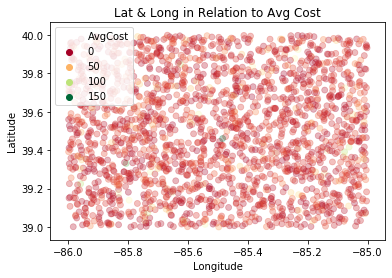

In [218]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='AvgCost', edgecolor=None, alpha=0.3, palette='RdYlGn').set_title('Lat & Long in Relation to Avg Cost')

Text(0.5, 1.0, 'Lat & Long in Relation to Score on my Scale')

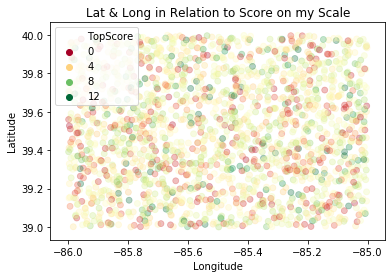

In [219]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='TopScore', edgecolor=None, alpha=0.3, palette='RdYlGn').set_title('Lat & Long in Relation to Score on my Scale')


Text(0.5, 1.0, 'Lat & Long in Relation to Rating')

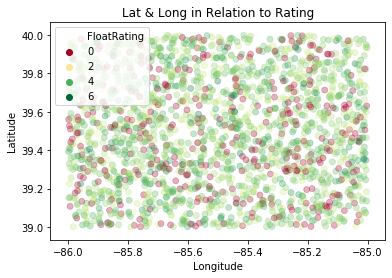

In [220]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='FloatRating', edgecolor=None, alpha=0.3, palette='RdYlGn').set_title('Lat & Long in Relation to Rating')

Text(0.5, 1.0, 'Lat & Long in Relation to Cooking Time')

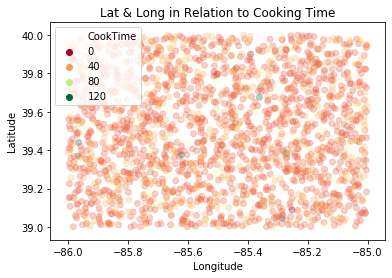

In [221]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='CookTime', edgecolor=None, alpha=0.3, palette='RdYlGn').set_title('Lat & Long in Relation to Cooking Time')


**Conclusion #4:** *Food Stats* 

* **Average Cheapest Food**: Restaurants that served Paan had an average cost of \$9.37 

* **Average Most Expensisve Food**: Restaurants that served Cantonese had an average cost of \$100.00 
* **Average Least Expensive Food**: The lowest average cook time with 30 minutes  
    Foods with 30 min Cook time: Bihari, Hyderabadi, Assamese, Chettinad, Parsi, Tamil, Cantonese, North Eastern, Bar Food, Konkan, Paan, Bohri, Afghan, Goan, Raw Meats, Vietnamese, Sri Lankan, Poké ,Roast Chicken, Naga, Korean, Awadhi, French, Charcoal Chicken, Bangladeshi

* **Average Longest CookTime**: Belgen Food had the longest cooktime with 65 minutes  

* **Average Highest Ratings**: Bubble Tea and Cantonese all had a average rating of 4.7  

* **Lowest Highest Rating**: Assamese & Roast Chicken had a average rating of zero

# Final Thoughts

Finally, we can gain quite a bit of knowledge from all of the conclusions that are drawn. From conclusion 1, we can conclude the highest rated restaurants(s) and even go to the trendiest one at the moment which was ID_6278. Furthermore, in conclusion 2 we learned that if we are ever in a hurry and do not have much money on us we can always check out ID_3209 for some cost and time effective food. Even more, from conclusion three no matter where we are we will be able to find a solid restaurant in the region. Last of all, we make a lot of descisions based off food and their average cost, rating, and my rating scale. For example, if we need something cheap we should go to a restaurant that sells Paan. If we are feeling expensive we can go to one that serves Cantonese. We also can look at the average time if we need to figure out how long we want our meal to be. All in all, this data analysis could be very useful when deciding what restaurants you want to go too if 